In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\HP\\Downloads\cereals.csv')

dfnew = df[['calories',
'protein',
'fat',
'sodium',
'fiber',
'carbo',
'sugars',
'potass',
'vitamins','rating']]

In [2]:
dfnew.head(5)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,rating
0,70,4,1,130,10.0,5.0,6,280,25,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,34.384843


In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(dfnew)
y_kmeans = kmeans.predict(dfnew)

In [38]:
y_kmeans

array([3, 1, 3, 3, 2, 0, 0, 0, 0, 3, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 1, 2,
       0, 0, 0, 2, 1, 3, 0, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 3, 2, 1, 1, 0, 1, 3, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       2, 3, 0, 2, 0, 0, 0, 0])

In [40]:
dfnew.head()
df3 = dfnew.assign(clusterNo = y_kmeans, namex = df['name'])
print(df3.head())

   calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1       120        3    5      15    2.0    8.0       8     135         0   
2        70        4    1     260    9.0    7.0       5     320        25   
3        50        4    0     140   14.0    8.0       0     330        25   
4       110        2    2     200    1.0   14.0       8      -1        25   

      rating  clusterNo                      namex  
0  68.402973          3                  100%_Bran  
1  33.983679          1          100%_Natural_Bran  
2  59.425505          3                   All-Bran  
3  93.704912          3  All-Bran_with_Extra_Fiber  
4  34.384843          2             Almond_Delight  


In [47]:
from pandasql import sqldf
print(sqldf("select namex,clusterno,calories from df3 where clusterno=3"))

                       namex  clusterNo  calories
0                  100%_Bran          3        70
1                   All-Bran          3        70
2  All-Bran_with_Extra_Fiber          3        50
3                Bran_Flakes          3        90
4              Fruitful_Bran          3       120
5      Post_Nat._Raisin_Bran          3       120
6                Raisin_Bran          3       120
7          Total_Raisin_Bran          3       140


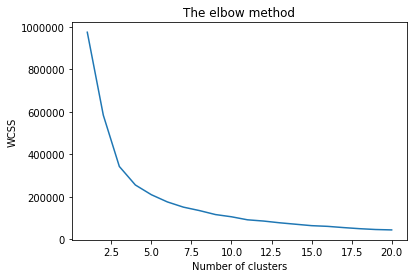

In [11]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfnew)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 21), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [19]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

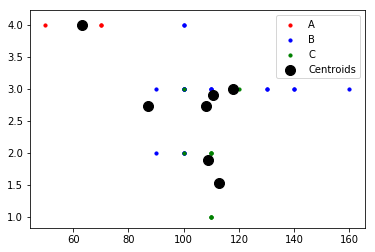

In [22]:
#Visualising the clusters
x = dfnew.iloc[:, [0,1, 2, 3, 4,5,6,7,8]].values
y = dfnew.iloc[:,9]
import numpy as np
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 10, c = 'red', label = 'A')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'B')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 10, c = 'green', label = 'C')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

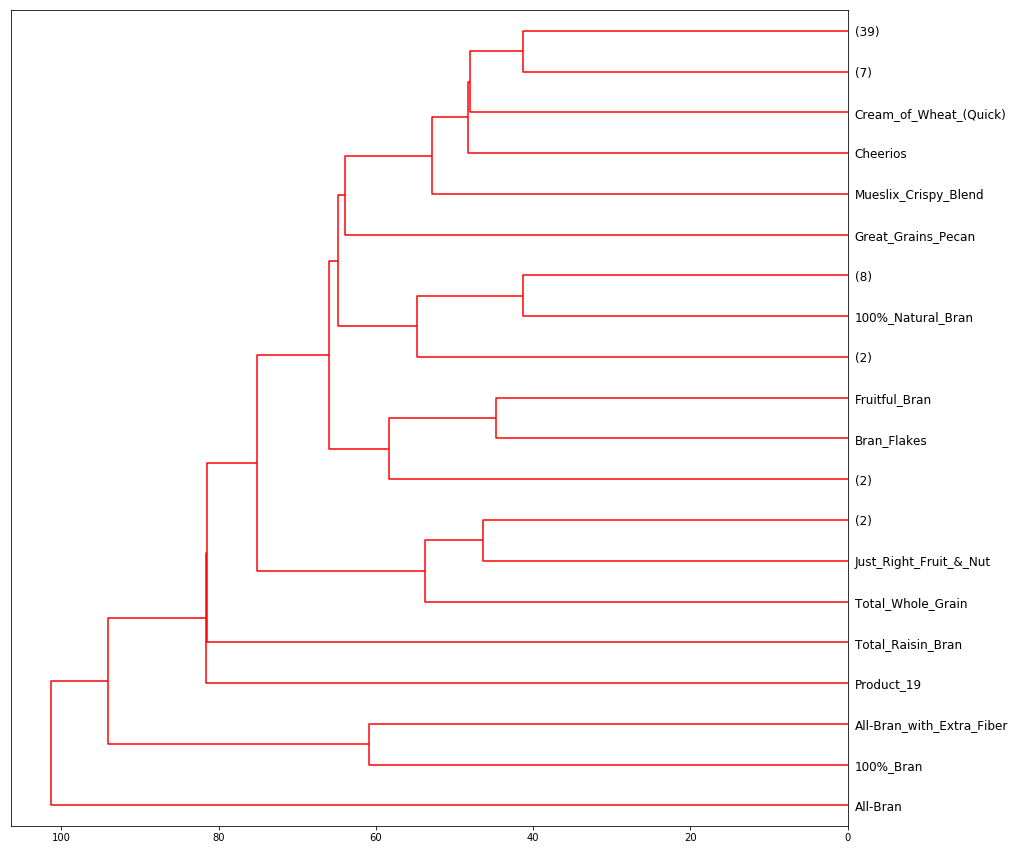

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

#df = df.set_index('name')
#del df.index.name

linked = linkage(dfnew, 'single')

labelList = range(1, 11)

plt.figure(figsize=(15, 15))  

#dfnew.shape
#df = df.set_index('name')

dendrogram(linked, orientation='left', labels=df.index, color_threshold=40, above_threshold_color='red', truncate_mode='lastp',
    p=20)
plt.show()


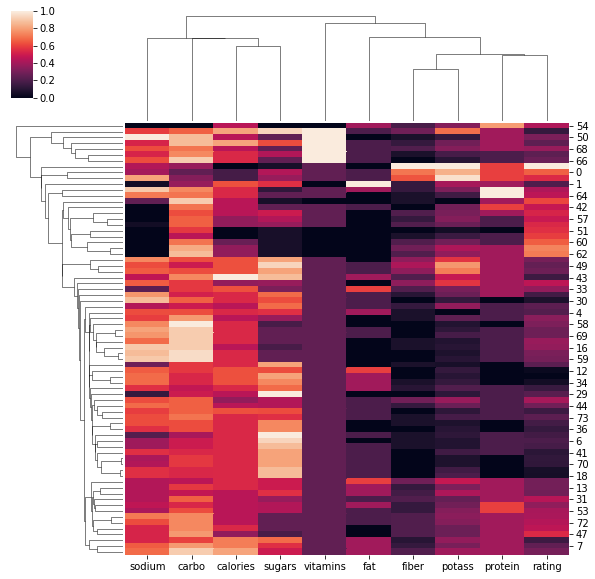

In [54]:
import seaborn as sns
sns.clustermap(dfnew, metric="euclidean", standard_scale=1, method="single")